In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('seaborn')

In [2]:
fn = './data.csv'
df = pd.read_csv(fn)
df = df[df['Rating'].notnull()] #This will remove entries that don't have a review.
df = df[df['WriteUp'].notnull()] #This will remove entries that don't have any text.
df = df[df['WriteUp'].map(len) > 2] #Remove all reviews fewer than 3 characters. 

In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
ratings = df['Rating']
writeups = df['WriteUp']

In [5]:
negative = writeups[ratings<6.0]
neutral = writeups[(ratings==6.0) | (ratings==7.0)]
positive = writeups[ratings>7.0]

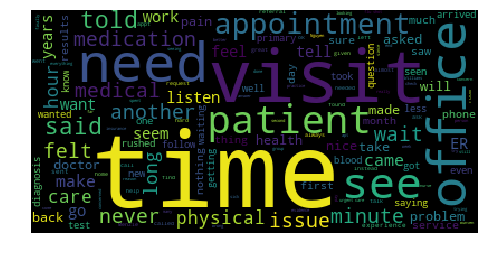

In [6]:
wordcloud = WordCloud(
                      relative_scaling = 1.0,
                      stopwords = STOPWORDS.update(('Dr', 'doctor'))
                      ).generate(negative.str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


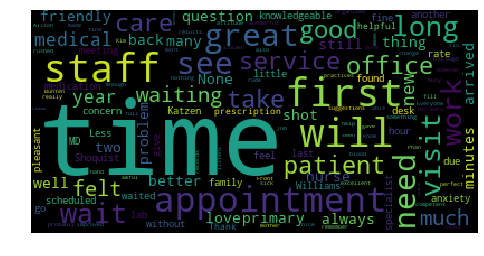

In [7]:
wordcloud = WordCloud(
                      relative_scaling = 1.0,
                      stopwords = STOPWORDS#.update(('Dr', 'doctor', 'will'))
                      ).generate(neutral.str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

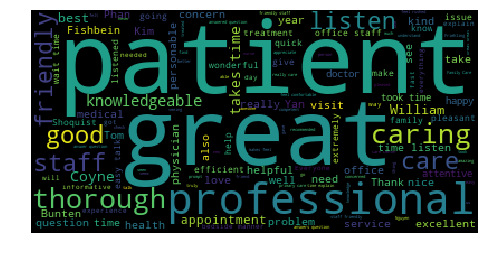

In [8]:
wordcloud = WordCloud(       
                      relative_scaling = 1.0,
                      stopwords = STOPWORDS.update(('Dr', 'doctor', 'alway', 'always')),
                      ).generate(positive.str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
from PIL import Image
from os import path
cross_mask = np.array(Image.open("cross.jpg"))

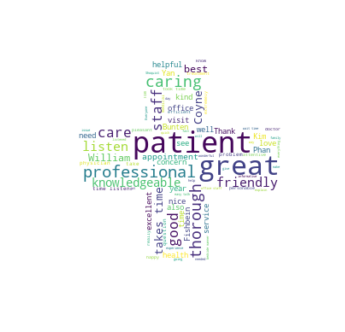

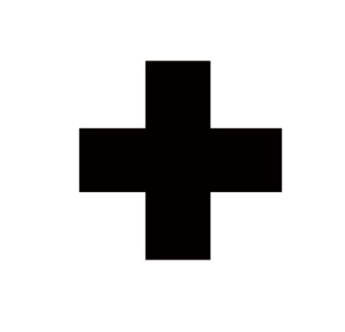

In [10]:
wordcloud = WordCloud(       
                      background_color="white",
                      relative_scaling = 1,
                      stopwords = STOPWORDS.update(('Dr', 'doctor')),
                      mask=cross_mask
                      ).generate(positive.str.cat(sep=' '))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(cross_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()